In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from reliability.Fitters import Fit_Weibull_2P
from fitter import Fitter
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import lognorm, kstest

In [2]:
import glob
path = 'D:\R\Statistical-Analysis-and-Forecasting-of-Solar-Energy-main\Statistical-Analysis-and-Forecasting-of-Solar-Energy-main\Renewable Energy Data\Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [4]:
import datetime as dt

df_all = frame[['Date','GHI']]
df_all.set_index('Date',inplace=True)
df_all = df_all.between_time('09:00','15:00')

In [5]:
df_all.head()

,GHI
Date,
2000-01-01 09:00:00,547
2000-01-01 10:00:00,714
2000-01-01 11:00:00,818
2000-01-01 12:00:00,797
2000-01-01 13:00:00,790


In [6]:
y = df_all['GHI']

In [7]:
stats.kstest(y, 'norm')

KstestResult(statistic=0.9998695368558382, pvalue=0.0)

In [8]:
y

Date
2000-01-01 09:00:00    547
2000-01-01 10:00:00    714
2000-01-01 11:00:00    818
2000-01-01 12:00:00    797
2000-01-01 13:00:00    790
                      ... 
2014-12-31 11:00:00    783
2014-12-31 12:00:00    812
2014-12-31 13:00:00    766
2014-12-31 14:00:00    572
2014-12-31 15:00:00    313
Name: GHI, Length: 38325, dtype: int64

In [9]:
y = y[y>0]

In [10]:
stats.kstest(y, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [11]:
y.replace([np.inf, -np.inf,0], 1, inplace=True)

In [12]:
y

Date
2000-01-01 09:00:00    547
2000-01-01 10:00:00    714
2000-01-01 11:00:00    818
2000-01-01 12:00:00    797
2000-01-01 13:00:00    790
                      ... 
2014-12-31 11:00:00    783
2014-12-31 12:00:00    812
2014-12-31 13:00:00    766
2014-12-31 14:00:00    572
2014-12-31 15:00:00    313
Name: GHI, Length: 38320, dtype: int64

In [13]:
stats.kstest(y, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [14]:
sigma, loc, scale = lognorm.fit(y, floc=0)

In [15]:
stat, p = kstest(y, 'lognorm', args=(sigma, 0, scale), alternative='two-sided')

In [16]:
stat

0.11242487358520048

In [17]:
p

0.0

In [18]:
params = stats.lognorm.fit(y)

In [19]:
params

(0.012385503293117047, -14847.276788717487, 15549.226915227977)

In [20]:
stats.kstest(y, "lognorm", params)

KstestResult(statistic=0.07454467571135537, pvalue=1.240021724360214e-185)

((array([-4.13063373, -3.92201283, -3.8081614 , ...,  3.8081614 ,
          3.92201283,  4.13063373]),
  array([  80,   81,   81, ..., 1045, 1046, 1055], dtype=int64)),
 (189.5293079565783, 702.5420146137786, 0.9815461456345499))

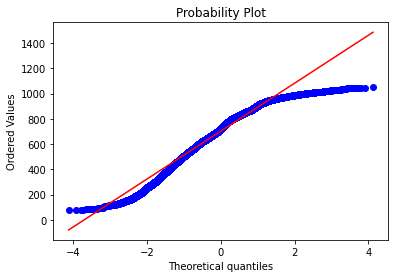

In [21]:
stats.probplot(y, dist="norm", plot=pylab)

In [22]:
f = Fitter(y)

In [23]:
f.fit()

,sumsquare_error,aic,bic,kl_div
beta,0.000008,1476.259656,-853864.191479,0.031079
genextreme,0.000008,1473.342094,-851819.292874,0.035408
dgamma,0.000011,1513.190666,-843261.676905,0.076232
dweibull,0.000011,1514.901966,-842173.867016,0.076405
loggamma,0.000012,1474.983616,-839632.774071,0.049020


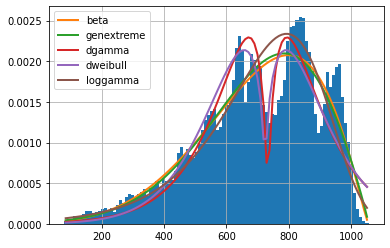

In [24]:
f.summary()

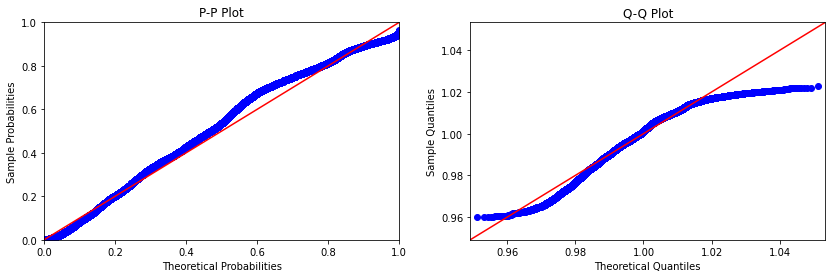

In [25]:
ig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(y, dist=lognorm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()


In [28]:
stats.kstest(y, 'gamma', (15.5, 7))

KstestResult(statistic=0.9999999999999999, pvalue=0.0)

In [29]:
stats.kstest(y, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [30]:
stats.kstest(y, "lognorm", params)

KstestResult(statistic=0.07454467571135537, pvalue=1.240021724360214e-185)

In [31]:
stats.kstest(y, 'loggamma', (15.5, 7))

KstestResult(statistic=1.0, pvalue=0.0)

In [32]:
stats.kstest(y, 'expon')

KstestResult(statistic=1.0, pvalue=0.0)

In [33]:
args = stats.weibull_min.fit(y)
kstest(y, 'weibull_min', args=args, N=100000)

KstestResult(statistic=0.8092041372174119, pvalue=0.0)